# Add New Feature
Texture

In [98]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import fiona
import rasterio
import rasterio.mask
import os
from shapely.geometry import Point
import numpy as np

In [2]:
# clip sw texture tif file
file_names = ['austin_sw_4326']

for file_name in file_names:
    # clip the raster file with polygons
    # read polygons_species_mode shapefile
    with fiona.open('sw_polygons_species_mode.shp', 'r') as shapefile:
        shapes = [feature['geometry'] for feature in shapefile]

    # read imagery file
    raster_file = file_name + str('.tif')
    with rasterio.open(raster_file) as src:
        out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
        out_meta = src.meta

    # save clipped imagery
    out_meta.update({'driver': 'GTiff', 
                     'height': out_image.shape[1], 
                     'width': out_image.shape[2], 
                     'transform': out_transform})

    clipped_file_name = file_name + str('_clipped.tif')
    with rasterio.open(clipped_file_name, 'w', **out_meta) as dest: 
        dest.write(out_image)

/Users/kennywu/opt/anaconda3/lib/python3.8/site-packages/rasterio/mask.py:191: NodataShadowWarning: The dataset's nodata attribute is shadowing the alpha band. All masks will be determined by the nodata attribute
  out_image = dataset.read(


In [100]:
# Set nodata value
source_raster_path = "test_se_raster.tif"
with rasterio.open(source_raster_path, "r+") as src:
    src.nodata = 0.0 # set the nodata value
#     profile = src.profile
#     profile.update(
#             dtype=rasterio.uint8,
#             compress='lzw'
#     )

In [35]:
polygons = gpd.read_file('sw_polygons_species_mode.shp')
#pixel_energy = gpd.read_file('sw_pixel_energy.shp')
pixel_variance = gpd.read_file('sw_clip_text5_var.shp')

print("polygon: ", polygons.crs)
print("pixel variance: ", pixel_variance.crs)

DriverError: se_text_simple.shp: No such file or directory

In [8]:
pixel_variance = gpd.read_file('sw_clip_text5_var.shp')
print("pixel variance: ", pixel_variance.crs)

pixel variance:  epsg:4326


In [9]:
pixel_variance

,text_var,geometry
0,0.805556,POINT (-97.74410 30.31250)
1,2.698889,POINT (-97.74409 30.31250)
2,3.778889,POINT (-97.74408 30.31250)
3,3.795556,POINT (-97.74408 30.31250)
4,3.143333,POINT (-97.74407 30.31250)
...,...,...
3128896,0.960400,POINT (-97.68949 30.25069)
3128897,0.960400,POINT (-97.68948 30.25069)
3128898,0.960400,POINT (-97.68948 30.25069)
3128899,0.960400,POINT (-97.68947 30.25069)


In [25]:
pixel_entropy = gpd.read_file('sw_clip_entropy.shp')
print("pixel entropy: ", pixel_entropy.crs)

pixel entropy:  epsg:4326


In [26]:
pixel_entropy

,entropy,geometry
0,0.420026,POINT (-97.74410 30.31250)
1,1.503307,POINT (-97.74409 30.31250)
2,2.573557,POINT (-97.74408 30.31250)
3,3.199581,POINT (-97.74408 30.31250)
4,3.506891,POINT (-97.74407 30.31250)
...,...,...
3128896,0.282292,POINT (-97.68949 30.25069)
3128897,0.282292,POINT (-97.68948 30.25069)
3128898,0.282292,POINT (-97.68948 30.25069)
3128899,0.282292,POINT (-97.68947 30.25069)


In [29]:
pixel_correlation = gpd.read_file('sw_clip_correlation.shp')
print("pixel correlation: ", pixel_correlation.crs)

pixel correlation:  epsg:4326


In [30]:
pixel_correlation

,correlatio,geometry
0,-0.042806,POINT (-97.74410 30.31250)
1,-0.055067,POINT (-97.74409 30.31250)
2,0.024199,POINT (-97.74408 30.31250)
3,0.004319,POINT (-97.74408 30.31250)
4,-0.063087,POINT (-97.74407 30.31250)
...,...,...
3104261,-0.021250,POINT (-97.68949 30.25069)
3104262,-0.021250,POINT (-97.68948 30.25069)
3104263,-0.021250,POINT (-97.68948 30.25069)
3104264,-0.021250,POINT (-97.68947 30.25069)


In [45]:
se_variance = gpd.read_file('se_variance.shp')
print("pixel variance: ", se_variance.crs)

se_entropy = gpd.read_file('se_entropy.shp')
print("pixel variance: ", se_entropy.crs)

se_correlation = gpd.read_file('se_correlation.shp')
print("pixel variance: ", se_correlation.crs)

pixel variance:  epsg:4326
pixel variance:  epsg:4326
pixel variance:  epsg:4326


In [46]:
se_variance

,variance,geometry
0,0.182222,POINT (-97.77064 30.31244)
1,0.276667,POINT (-97.77063 30.31244)
2,0.315556,POINT (-97.77062 30.31244)
3,0.288889,POINT (-97.77062 30.31244)
4,0.245556,POINT (-97.77061 30.31244)
...,...,...
1246331,1.547500,POINT (-97.75905 30.25000)
1246332,1.447500,POINT (-97.75904 30.25000)
1246333,1.027500,POINT (-97.75903 30.25000)
1246334,0.510000,POINT (-97.75903 30.25000)


In [47]:
se_entropy

,entropy,geometry
0,1.105587,POINT (-97.77064 30.31244)
1,1.821276,POINT (-97.77063 30.31244)
2,2.139572,POINT (-97.77062 30.31244)
3,2.079799,POINT (-97.77062 30.31244)
4,1.932915,POINT (-97.77061 30.31244)
...,...,...
1246331,2.970951,POINT (-97.75905 30.25000)
1246332,2.770951,POINT (-97.75904 30.25000)
1246333,2.085475,POINT (-97.75903 30.25000)
1246334,1.181291,POINT (-97.75903 30.25000)


In [49]:
se_correlation

,correlatio,geometry
0,-0.535396,POINT (-97.77064 30.31244)
1,0.566120,POINT (-97.77063 30.31244)
2,0.490974,POINT (-97.77062 30.31244)
3,0.266272,POINT (-97.77062 30.31244)
4,-0.902930,POINT (-97.77061 30.31244)
...,...,...
1236624,-0.209833,POINT (-97.75905 30.25000)
1236625,-0.048920,POINT (-97.75904 30.25000)
1236626,-0.021312,POINT (-97.75903 30.25000)
1236627,-0.346021,POINT (-97.75903 30.25000)


In [79]:
sw_red = gpd.read_file('sw_r_point.shp')

In [80]:
sw_red

,r,geometry
0,63.0,POINT (-97.74406 30.31250)
1,62.0,POINT (-97.74404 30.31250)
2,60.0,POINT (-97.74404 30.31250)
3,68.0,POINT (-97.74403 30.31250)
4,54.0,POINT (-97.74402 30.31250)
...,...,...
1845077,149.0,POINT (-97.68951 30.25071)
1845078,140.0,POINT (-97.68948 30.25071)
1845079,143.0,POINT (-97.68947 30.25071)
1845080,146.0,POINT (-97.68946 30.25071)


In [68]:
se_texture = gpd.sjoin(se_red, se_variance, how='left')
se_texture.drop(columns='index_right',inplace=True)

In [71]:
se_texture = gpd.sjoin(se_texture, se_entropy, how='left')
se_texture.drop(columns='index_right',inplace=True)

In [74]:
se_texture_final = gpd.sjoin(se_texture, se_correlation, how='left')
se_texture_final.drop(columns='index_right',inplace=True)

In [77]:
se_texture_final.drop(columns='r',inplace=True)
se_texture_final

,geometry,variance,entropy,correlatio
0,POINT (-97.77061 30.31244),0.232222,1.656565,2.451867
1,POINT (-97.77062 30.31243),0.424375,2.571928,0.551795
2,POINT (-97.77061 30.31243),0.359375,2.469973,-0.120983
3,POINT (-97.77061 30.31243),0.337500,2.214980,1.646091
4,POINT (-97.77060 30.31243),0.299375,1.989354,1.945598
...,...,...,...,...
739685,POINT (-97.75931 30.25000),0.840000,2.173557,-0.037793
739686,POINT (-97.75930 30.25000),0.978889,2.498930,-0.056818
739687,POINT (-97.75929 30.25000),1.240000,2.698930,0.112730
739688,POINT (-97.75929 30.25000),1.382222,2.698930,0.165166


In [76]:
se_texture_final.isnull().sum()

r                 0
geometry          0
variance      16825
entropy       16825
correlatio    25703
dtype: int64

In [78]:
se_texture_final.columns = ['geometry', 'variance', 'entropy', 'correlation']
se_texture_final.to_file('se_texture3.shp')

<ipython-input-78-1fe0363506b3>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  se_texture_final.to_file('se_texture3.shp')


In [84]:
# join all three textures
sw_texture = gpd.sjoin(sw_red, pixel_variance, how='left')
sw_texture.drop(columns='index_right',inplace=True)

In [85]:
sw_texture = gpd.sjoin(sw_texture, pixel_entropy, how='left')
sw_texture.drop(columns='index_right',inplace=True)

In [87]:
sw_texture.isnull().sum()

r               0
geometry        0
text_var    25034
entropy     25034
dtype: int64

In [90]:
sw_texture_final = gpd.sjoin(sw_texture, pixel_correlation, how='left')
sw_texture_final.drop(columns='index_right',inplace=True)

In [96]:
sw_texture_final

,geometry,variance,entropy,correlation
0,POINT (-97.74406 30.31250),1.232222,2.396792,-0.044638
1,POINT (-97.74404 30.31250),1.226667,2.965596,0.017722
2,POINT (-97.74404 30.31250),0.995556,2.965596,0.062779
3,POINT (-97.74403 30.31250),1.072222,3.272906,0.091815
4,POINT (-97.74402 30.31250),0.876667,2.882589,0.143128
...,...,...,...,...
1845077,POINT (-97.68951 30.25071),6.190400,2.367352,0.042546
1845078,POINT (-97.68948 30.25071),6.491600,3.294694,0.024480
1845079,POINT (-97.68947 30.25071),6.801600,3.284889,0.019921
1845080,POINT (-97.68946 30.25071),6.419600,3.091511,0.014549


In [95]:
sw_texture_final.columns = ['geometry', 'variance', 'entropy', 'correlation']
sw_texture_final.to_file('sw_texture3.shp')

<ipython-input-95-5988840baa8e>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  sw_texture_final.to_file('sw_texture3.shp')


In [76]:
#pixel_var_clip = gpd.clip(pixel_variance, polygons)

In [86]:
#points_variance.to_file('sw_point_variance_clip.shp')

In [68]:
#austin_sw_raster = rasterio.open('sw_texture_advance.tif')

In [72]:
# sw variance extract

single_band = austin_sw_raster.read(2)

# create the output filename
out_name = os.path.basename('sw_texture_variance.tif')

# copy the metadata
out_meta = austin_sw_raster.meta.copy()
out_meta.update({"count": 1})

# save the single-band raster
with rasterio.open(out_name, "w", **out_meta) as dest:
    dest.write(single_band, 1)

In [78]:
# Join energy and variance with our training data
# energy_n_variance = gpd.sjoin(points_variance, points_energy)
# energy_n_variance

,texture_va,geometry,index_right,energy


In [12]:
df_sw = gpd.read_file('sw_pixel_points_features_species.shp')

In [13]:
df_final2 = df_sw.drop(columns=['r_mean', 'g_mean', 'b_mean', 'nir_mean', 'ndvi_mean', 'point_inde', 'heights', 
                                'r_min', 'g_min','b_min','nir_min','ndvi_min'])

In [14]:
df_final2

,r,g,b,nir,ndvi,r_max,g_max,b_max,nir_max,ndvi_max,r_std,g_std,b_std,nir_std,ndvi_std,SPECIES,geometry
0,63.0,85.0,68.0,177.0,0.475000,80.0,97.0,76.0,186.0,0.475000,4.802263,3.552082,2.165954,4.693047,0.034652,others,POINT (-97.74406 30.31250)
1,62.0,91.0,67.0,179.0,0.485477,73.0,98.0,72.0,184.0,0.500000,4.055175,4.242641,1.563472,3.091206,0.020734,others,POINT (-97.74404 30.31250)
2,60.0,84.0,67.0,180.0,0.500000,75.0,98.0,76.0,184.0,0.500000,5.384018,5.120764,2.788867,3.071172,0.028874,others,POINT (-97.74404 30.31250)
3,68.0,87.0,70.0,177.0,0.444898,75.0,99.0,77.0,186.0,0.509091,6.565905,6.172420,4.399776,8.799551,0.044697,others,POINT (-97.74403 30.31250)
4,54.0,76.0,64.0,166.0,0.509091,74.0,99.0,77.0,186.0,0.509091,8.098164,7.659417,5.057692,11.438510,0.053858,others,POINT (-97.74402 30.31250)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845077,149.0,147.0,135.0,136.0,-0.045614,152.0,149.0,138.0,164.0,0.119454,9.486833,9.723333,8.870815,13.358310,0.079091,southern live oak,POINT (-97.68951 30.25071)
1845078,140.0,139.0,123.0,148.0,0.027778,152.0,150.0,136.0,177.0,0.340909,27.486473,22.642143,20.472807,18.004801,0.170044,southern live oak,POINT (-97.68948 30.25071)
1845079,143.0,140.0,127.0,140.0,-0.010601,151.0,148.0,136.0,177.0,0.340909,24.567368,19.743416,18.237799,17.701223,0.157572,southern live oak,POINT (-97.68947 30.25071)
1845080,146.0,142.0,133.0,128.0,-0.065693,151.0,148.0,136.0,173.0,0.315589,19.107882,15.533318,14.047539,14.969929,0.126742,southern live oak,POINT (-97.68946 30.25071)


In [15]:
df_final2_variance = gpd.sjoin(df_final2, pixel_variance)
df_final2_variance

,r,g,b,nir,ndvi,r_max,g_max,b_max,nir_max,ndvi_max,r_std,g_std,b_std,nir_std,ndvi_std,SPECIES,geometry,index_right,text_var
0,63.0,85.0,68.0,177.0,0.475000,80.0,97.0,76.0,186.0,0.475000,4.802263,3.552082,2.165954,4.693047,0.034652,others,POINT (-97.74406 30.31250),6,1.232222
1,62.0,91.0,67.0,179.0,0.485477,73.0,98.0,72.0,184.0,0.500000,4.055175,4.242641,1.563472,3.091206,0.020734,others,POINT (-97.74404 30.31250),9,1.226667
2,60.0,84.0,67.0,180.0,0.500000,75.0,98.0,76.0,184.0,0.500000,5.384018,5.120764,2.788867,3.071172,0.028874,others,POINT (-97.74404 30.31250),10,0.995556
3,68.0,87.0,70.0,177.0,0.444898,75.0,99.0,77.0,186.0,0.509091,6.565905,6.172420,4.399776,8.799551,0.044697,others,POINT (-97.74403 30.31250),12,1.072222
4,54.0,76.0,64.0,166.0,0.509091,74.0,99.0,77.0,186.0,0.509091,8.098164,7.659417,5.057692,11.438510,0.053858,others,POINT (-97.74402 30.31250),13,0.876667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845077,149.0,147.0,135.0,136.0,-0.045614,152.0,149.0,138.0,164.0,0.119454,9.486833,9.723333,8.870815,13.358310,0.079091,southern live oak,POINT (-97.68951 30.25071),3128825,6.190400
1845078,140.0,139.0,123.0,148.0,0.027778,152.0,150.0,136.0,177.0,0.340909,27.486473,22.642143,20.472807,18.004801,0.170044,southern live oak,POINT (-97.68948 30.25071),3128831,6.491600
1845079,143.0,140.0,127.0,140.0,-0.010601,151.0,148.0,136.0,177.0,0.340909,24.567368,19.743416,18.237799,17.701223,0.157572,southern live oak,POINT (-97.68947 30.25071),3128832,6.801600
1845080,146.0,142.0,133.0,128.0,-0.065693,151.0,148.0,136.0,173.0,0.315589,19.107882,15.533318,14.047539,14.969929,0.126742,southern live oak,POINT (-97.68946 30.25071),3128833,6.419600


In [27]:
df_final2_variance.drop(columns='index_right',inplace=True)
df_final2_var_ent = gpd.sjoin(df_final2_variance, pixel_entropy)

In [31]:
df_final2_var_ent.drop(columns='index_right',inplace=True)
df_final2_texture = gpd.sjoin(df_final2_var_ent, pixel_correlation)

In [33]:
df_final2_texture.drop(columns='index_right',inplace=True)
df_final2_texture.to_file('sw_pixel_features_species_texture.shp')

In [34]:
df_final2_texture

,r,g,b,nir,ndvi,r_max,g_max,b_max,nir_max,ndvi_max,r_std,g_std,b_std,nir_std,ndvi_std,SPECIES,geometry,text_var,entropy,correlatio
0,63.0,85.0,68.0,177.0,0.475000,80.0,97.0,76.0,186.0,0.475000,4.802263,3.552082,2.165954,4.693047,0.034652,others,POINT (-97.74406 30.31250),1.232222,2.396792,-0.044638
1,62.0,91.0,67.0,179.0,0.485477,73.0,98.0,72.0,184.0,0.500000,4.055175,4.242641,1.563472,3.091206,0.020734,others,POINT (-97.74404 30.31250),1.226667,2.965596,0.017722
2,60.0,84.0,67.0,180.0,0.500000,75.0,98.0,76.0,184.0,0.500000,5.384018,5.120764,2.788867,3.071172,0.028874,others,POINT (-97.74404 30.31250),0.995556,2.965596,0.062779
3,68.0,87.0,70.0,177.0,0.444898,75.0,99.0,77.0,186.0,0.509091,6.565905,6.172420,4.399776,8.799551,0.044697,others,POINT (-97.74403 30.31250),1.072222,3.272906,0.091815
4,54.0,76.0,64.0,166.0,0.509091,74.0,99.0,77.0,186.0,0.509091,8.098164,7.659417,5.057692,11.438510,0.053858,others,POINT (-97.74402 30.31250),0.876667,2.882589,0.143128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845077,149.0,147.0,135.0,136.0,-0.045614,152.0,149.0,138.0,164.0,0.119454,9.486833,9.723333,8.870815,13.358310,0.079091,southern live oak,POINT (-97.68951 30.25071),6.190400,2.367352,0.042546
1845078,140.0,139.0,123.0,148.0,0.027778,152.0,150.0,136.0,177.0,0.340909,27.486473,22.642143,20.472807,18.004801,0.170044,southern live oak,POINT (-97.68948 30.25071),6.491600,3.294694,0.024480
1845079,143.0,140.0,127.0,140.0,-0.010601,151.0,148.0,136.0,177.0,0.340909,24.567368,19.743416,18.237799,17.701223,0.157572,southern live oak,POINT (-97.68947 30.25071),6.801600,3.284889,0.019921
1845080,146.0,142.0,133.0,128.0,-0.065693,151.0,148.0,136.0,173.0,0.315589,19.107882,15.533318,14.047539,14.969929,0.126742,southern live oak,POINT (-97.68946 30.25071),6.419600,3.091511,0.014549


In [93]:
points_variance.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
# debug !!!

# df_final2[df_final2['geometry'].geom_equal(Point(-97.72512265,30.29926456))]
# points_variance[points_variance['geometry'].geom_equal(Point(-97.68843,30.27817))]
# Point(-97.69049,30.31169) in points_variance['geometry'].values

# Feature Correlation


In [10]:
df.columns

Index(['r', 'g', 'b', 'nir', 'ndvi', 'r_mean', 'g_mean', 'b_mean', 'nir_mean',
       'ndvi_mean', 'r_max', 'g_max', 'b_max', 'nir_max', 'ndvi_max', 'r_min',
       'g_min', 'b_min', 'nir_min', 'ndvi_min', 'r_std', 'g_std', 'b_std',
       'nir_std', 'ndvi_std', 'point_inde', 'heights', 'SPECIES', 'geometry'],
      dtype='object')

In [17]:
df

,r,g,b,nir,ndvi,r_mean,g_mean,b_mean,nir_mean,ndvi_mean,...,ndvi_min,r_std,g_std,b_std,nir_std,ndvi_std,point_inde,heights,SPECIES,geometry
0,63.0,85.0,68.0,177.0,0.475000,67.222221,90.222221,70.444443,177.555557,0.450931,...,0.357430,4.802263,3.552082,2.165954,4.693047,0.034652,1,29,others,POINT (-97.74406 30.31250)
1,62.0,91.0,67.0,179.0,0.485477,64.000000,89.000000,68.666664,178.666672,0.472965,...,0.427451,4.055175,4.242641,1.563472,3.091206,0.020734,2,29,others,POINT (-97.74404 30.31250)
2,60.0,84.0,67.0,180.0,0.500000,65.111114,89.000000,69.333336,179.111115,0.467537,...,0.411765,5.384018,5.120764,2.788867,3.071172,0.028874,3,29,others,POINT (-97.74404 30.31250)
3,68.0,87.0,70.0,177.0,0.444898,68.000000,88.111114,71.444443,175.111115,0.440984,...,0.356522,6.565905,6.172420,4.399776,8.799551,0.044697,4,29,others,POINT (-97.74403 30.31250)
4,54.0,76.0,64.0,166.0,0.509091,65.555557,85.000000,70.444443,168.777771,0.441234,...,0.356522,8.098164,7.659417,5.057692,11.438510,0.053858,5,29,others,POINT (-97.74402 30.31250)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845077,149.0,147.0,135.0,136.0,-0.045614,143.666672,140.888885,129.555557,142.666672,-0.004563,...,-0.070922,9.486833,9.723333,8.870815,13.358310,0.079091,1845078,24,southern live oak,POINT (-97.68951 30.25071)
1845078,140.0,139.0,123.0,148.0,0.027778,126.222221,127.666664,115.555557,152.222229,0.099259,...,-0.070922,27.486473,22.642143,20.472807,18.004801,0.170044,1845079,24,southern live oak,POINT (-97.68948 30.25071)
1845079,143.0,140.0,127.0,140.0,-0.010601,130.000000,130.555557,119.777779,145.666672,0.060805,...,-0.075812,24.567368,19.743416,18.237799,17.701223,0.157572,1845080,24,southern live oak,POINT (-97.68947 30.25071)
1845080,146.0,142.0,133.0,128.0,-0.065693,135.333328,134.777771,124.666664,138.111115,0.012090,...,-0.080882,19.107882,15.533318,14.047539,14.969929,0.126742,1845081,24,southern live oak,POINT (-97.68946 30.25071)


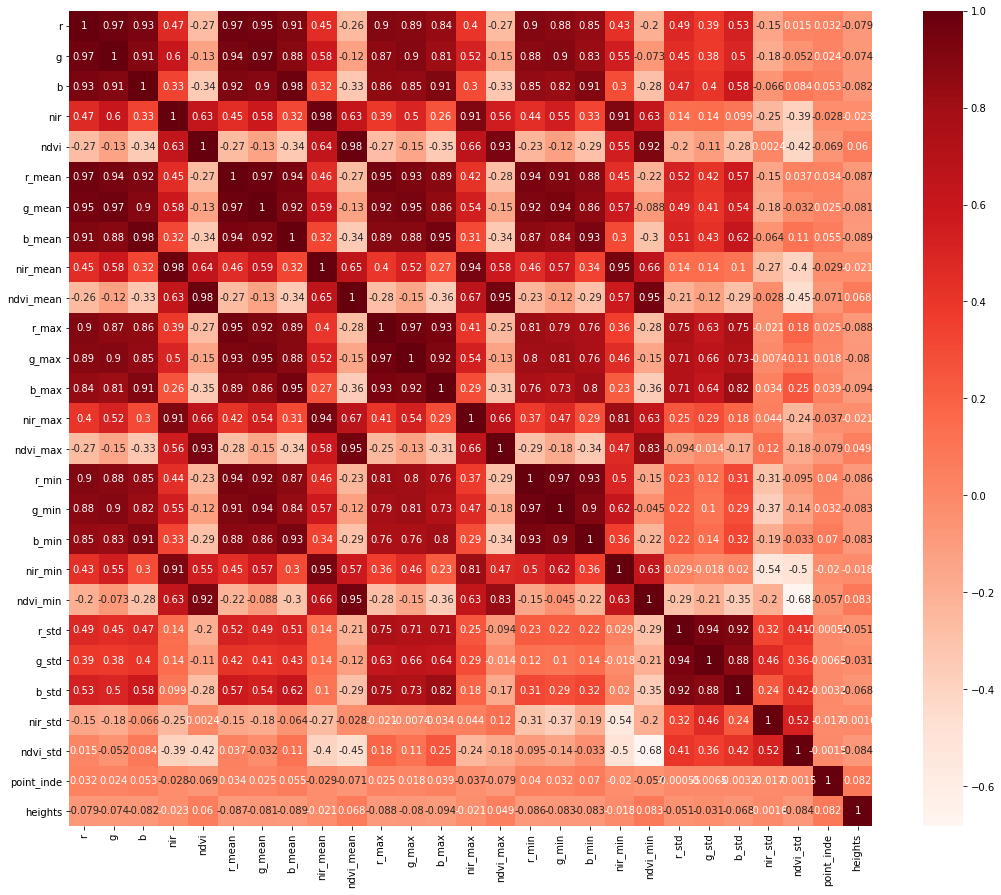

In [7]:
plt.figure(figsize=(18,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [21]:
cor.columns

Index(['r', 'g', 'b', 'nir', 'ndvi', 'r_mean', 'g_mean', 'b_mean', 'nir_mean',
       'ndvi_mean', 'r_min', 'g_min', 'b_min', 'nir_min', 'ndvi_min', 'r_max',
       'g_max', 'b_max', 'nir_max', 'ndvi_max', 'r_std', 'g_std', 'b_std',
       'nir_std', 'ndvi_std', 'point_inde', 'heights'],
      dtype='object')

In [27]:
#Correlation with output variable
cor_r = abs(cor["r"])
#Selecting highly correlated features
relevant_features_r = cor_r[cor_r>0.8]
relevant_features_r

r         1.000000
g         0.950870
b         0.934444
r_mean    0.965306
g_mean    0.927256
b_mean    0.906642
r_min     0.883040
g_min     0.843224
b_min     0.848641
r_max     0.882595
g_max     0.865797
b_max     0.817532
Name: r, dtype: float64

In [32]:
cor_nir = abs(cor["nir"])
relevant_features_nir = cor_nir[cor_nir>0.8]
relevant_features_nir

nir         1.000000
nir_mean    0.975026
nir_min     0.908057
nir_max     0.911595
Name: nir, dtype: float64

In [29]:
cor_ndvi = abs(cor["ndvi"])
relevant_features_ndvi = cor_ndvi[cor_ndvi>0.8]
relevant_features_ndvi

ndvi         1.000000
ndvi_mean    0.975077
ndvi_min     0.894921
ndvi_max     0.907074
Name: ndvi, dtype: float64

In [30]:
cor_r_std = abs(cor["r_std"])
relevant_features_r_std = cor_r_std[cor_r_std>0.8]
relevant_features_r_std

r_max    0.813885
r_std    1.000000
g_std    0.916721
b_std    0.915992
Name: r_std, dtype: float64

In [8]:
df_se = gpd.read_file('se_pixel_points_features_species.shp')

In [31]:
df_se

,r,g,b,nir,ndvi,r_mean,g_mean,b_mean,nir_mean,ndvi_mean,...,ndvi_max,r_std,g_std,b_std,nir_std,ndvi_std,point_inde,heights,SPECIES,geometry
0,38.0,43.0,55.0,89.0,0.401575,40.555557,47.000000,55.888889,104.000000,0.431843,...,0.500000,3.744956,5.395472,1.448712,21.081852,0.045311,1,22,ashe juniper,POINT (-97.77061 30.31244)
1,38.0,43.0,56.0,92.0,0.415385,42.888889,50.000000,57.222221,115.111114,0.448836,...,0.504673,4.863571,7.272475,2.199888,25.379101,0.049133,2,22,ashe juniper,POINT (-97.77062 30.31243)
2,39.0,43.0,55.0,86.0,0.376000,39.444443,44.666668,55.555557,94.888886,0.409532,...,0.466667,0.955814,2.867442,0.684935,10.619107,0.040477,3,22,ashe juniper,POINT (-97.77061 30.31243)
3,39.0,43.0,55.0,86.0,0.376000,39.000000,43.666668,55.111111,90.888886,0.397896,...,0.466667,1.054093,2.000000,0.314270,7.415366,0.030621,4,22,ashe juniper,POINT (-97.77061 30.31243)
4,37.0,44.0,55.0,90.0,0.417323,39.222221,44.666668,55.222221,94.666664,0.412356,...,0.463087,1.227262,2.403701,0.415740,8.246211,0.029227,5,22,ashe juniper,POINT (-97.77060 30.31243)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739685,49.0,55.0,63.0,93.0,0.309859,54.888889,59.444443,64.111114,102.000000,0.300887,...,0.315068,5.363341,4.297573,1.791613,8.366600,0.012115,739658,20,elm cedar,POINT (-97.75931 30.25000)
739686,49.0,56.0,64.0,93.0,0.309859,54.666668,60.222221,65.111114,106.333336,0.319302,...,0.363636,5.333333,4.262961,2.131481,13.216152,0.022205,739659,20,elm cedar,POINT (-97.75930 30.25000)
739687,58.0,60.0,66.0,118.0,0.340909,59.222221,64.888886,67.111114,118.111114,0.330333,...,0.374359,7.714025,7.093729,3.071172,17.136345,0.030523,739660,20,elm cedar,POINT (-97.75929 30.25000)
739688,65.0,73.0,69.0,138.0,0.359606,68.000000,72.444443,70.888886,132.333328,0.325993,...,0.374359,13.299958,11.096657,5.743488,12.445436,0.045331,739661,20,elm cedar,POINT (-97.75929 30.25000)


In [34]:
#Correlation with output variable
cor_r = abs(cor_se["r"])
#Selecting highly correlated features
relevant_features_r = cor_r[cor_r>0.8]
relevant_features_r

r         1.000000
g         0.950870
b         0.934444
r_mean    0.965306
g_mean    0.927256
b_mean    0.906642
r_min     0.883040
g_min     0.843224
b_min     0.848641
r_max     0.882595
g_max     0.865797
b_max     0.817532
Name: r, dtype: float64

In [35]:
cor_nir = abs(cor_se["nir"])
relevant_features_nir = cor_nir[cor_nir>0.8]
relevant_features_nir

nir         1.000000
nir_mean    0.975026
nir_min     0.908057
nir_max     0.911595
Name: nir, dtype: float64

In [36]:
cor_ndvi = abs(cor_se["ndvi"])
relevant_features_ndvi = cor_ndvi[cor_ndvi>0.8]
relevant_features_ndvi

ndvi         1.000000
ndvi_mean    0.975077
ndvi_min     0.894921
ndvi_max     0.907074
Name: ndvi, dtype: float64

In [37]:
cor_r_std = abs(cor_se["r_std"])
relevant_features_r_std = cor_r_std[cor_r_std>0.8]
relevant_features_r_std

r_max    0.813885
r_std    1.000000
g_std    0.916721
b_std    0.915992
Name: r_std, dtype: float64

In [38]:
cor_nir_std = abs(cor_se["nir_std"])
relevant_features_nir_std = cor_nir_std[cor_nir_std>0.8]
relevant_features_nir_std

nir_std    1.0
Name: nir_std, dtype: float64

## Feature Selection

In [16]:
# Combine selected features with texture variance
text_var = gpd.read_file('sw_clip_advance_var.shp')
text_var

,text_var,geometry
0,0.290000,POINT (-97.74410 30.31250)
1,1.106667,POINT (-97.74409 30.31250)
2,1.512222,POINT (-97.74408 30.31250)
3,1.556667,POINT (-97.74408 30.31250)
4,1.315556,POINT (-97.74407 30.31250)
...,...,...
3049445,0.313600,POINT (-97.68949 30.25069)
3049446,0.313600,POINT (-97.68948 30.25069)
3049447,0.313600,POINT (-97.68948 30.25069)
3049448,0.313600,POINT (-97.68947 30.25069)


In [32]:
text_mean = gpd.read_file('sw_clip_advance_mean.shp')

In [33]:
text_diffvar = gpd.read_file('sw_clip_advance_diffvar.shp')

In [34]:
text_mean

,text_mean,geometry
0,0.100000,POINT (-97.74410 30.31250)
1,0.400000,POINT (-97.74409 30.31250)
2,0.766667,POINT (-97.74408 30.31250)
3,1.100000,POINT (-97.74408 30.31250)
4,1.466667,POINT (-97.74407 30.31250)
...,...,...
3153519,0.080000,POINT (-97.68949 30.25069)
3153520,0.080000,POINT (-97.68948 30.25069)
3153521,0.080000,POINT (-97.68948 30.25069)
3153522,0.080000,POINT (-97.68947 30.25069)


In [35]:
text_diffvar

,text_diffv,geometry
0,0.290000,POINT (-97.74410 30.31250)
1,1.106667,POINT (-97.74409 30.31250)
2,1.183333,POINT (-97.74408 30.31250)
3,1.245556,POINT (-97.74408 30.31250)
4,1.240000,POINT (-97.74407 30.31250)
...,...,...
3033002,0.313600,POINT (-97.68949 30.25069)
3033003,0.313600,POINT (-97.68948 30.25069)
3033004,0.313600,POINT (-97.68948 30.25069)
3033005,0.313600,POINT (-97.68947 30.25069)


In [20]:
df_join_text = gpd.sjoin(df, text_var)
df_join_text

,r,g,b,nir,ndvi,r_mean,g_mean,b_mean,nir_mean,ndvi_mean,...,g_std,b_std,nir_std,ndvi_std,point_inde,heights,SPECIES,geometry,index_right,text_var
0,63.0,85.0,68.0,177.0,0.475000,67.222221,90.222221,70.444443,177.555557,0.450931,...,3.552082,2.165954,4.693047,0.034652,1,29,others,POINT (-97.74406 30.31250),6,0.543333
1,62.0,91.0,67.0,179.0,0.485477,64.000000,89.000000,68.666664,178.666672,0.472965,...,4.242641,1.563472,3.091206,0.020734,2,29,others,POINT (-97.74404 30.31250),9,0.605556
2,60.0,84.0,67.0,180.0,0.500000,65.111114,89.000000,69.333336,179.111115,0.467537,...,5.120764,2.788867,3.071172,0.028874,3,29,others,POINT (-97.74404 30.31250),10,0.490000
3,68.0,87.0,70.0,177.0,0.444898,68.000000,88.111114,71.444443,175.111115,0.440984,...,6.172420,4.399776,8.799551,0.044697,4,29,others,POINT (-97.74403 30.31250),12,0.560000
4,54.0,76.0,64.0,166.0,0.509091,65.555557,85.000000,70.444443,168.777771,0.441234,...,7.659417,5.057692,11.438510,0.053858,5,29,others,POINT (-97.74402 30.31250),13,0.476667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845077,149.0,147.0,135.0,136.0,-0.045614,143.666672,140.888885,129.555557,142.666672,-0.004563,...,9.723333,8.870815,13.358310,0.079091,1845078,24,southern live oak,POINT (-97.68951 30.25071),3049374,2.656400
1845078,140.0,139.0,123.0,148.0,0.027778,126.222221,127.666664,115.555557,152.222229,0.099259,...,22.642143,20.472807,18.004801,0.170044,1845079,24,southern live oak,POINT (-97.68948 30.25071),3049380,2.457600
1845079,143.0,140.0,127.0,140.0,-0.010601,130.000000,130.555557,119.777779,145.666672,0.060805,...,19.743416,18.237799,17.701223,0.157572,1845080,24,southern live oak,POINT (-97.68947 30.25071),3049381,2.680000
1845080,146.0,142.0,133.0,128.0,-0.065693,135.333328,134.777771,124.666664,138.111115,0.012090,...,15.533318,14.047539,14.969929,0.126742,1845081,24,southern live oak,POINT (-97.68946 30.25071),3049382,2.582400


In [37]:
df_join_text = df_join_text.drop(columns=['index_right'])
df_join_text = gpd.sjoin(df_join_text, text_mean)

df_join_text = df_join_text.drop(columns=['index_right'])
df_join_text = gpd.sjoin(df_join_text, text_diffvar)
df_join_text

,r,g,b,nir,ndvi,r_mean,g_mean,b_mean,nir_mean,ndvi_mean,...,nir_std,ndvi_std,point_inde,heights,SPECIES,geometry,text_var,text_mean,index_right,text_diffv
0,63.0,85.0,68.0,177.0,0.475000,67.222221,90.222221,70.444443,177.555557,0.450931,...,4.693047,0.034652,1,29,others,POINT (-97.74406 30.31250),0.543333,1.700000,6,0.498889
1,62.0,91.0,67.0,179.0,0.485477,64.000000,89.000000,68.666664,178.666672,0.472965,...,3.091206,0.020734,2,29,others,POINT (-97.74404 30.31250),0.605556,1.833333,9,0.432222
2,60.0,84.0,67.0,180.0,0.500000,65.111114,89.000000,69.333336,179.111115,0.467537,...,3.071172,0.028874,3,29,others,POINT (-97.74404 30.31250),0.490000,1.900000,10,0.343333
3,68.0,87.0,70.0,177.0,0.444898,68.000000,88.111114,71.444443,175.111115,0.440984,...,8.799551,0.044697,4,29,others,POINT (-97.74403 30.31250),0.560000,1.800000,12,0.355556
4,54.0,76.0,64.0,166.0,0.509091,65.555557,85.000000,70.444443,168.777771,0.441234,...,11.438510,0.053858,5,29,others,POINT (-97.74402 30.31250),0.476667,1.700000,13,0.312222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845077,149.0,147.0,135.0,136.0,-0.045614,143.666672,140.888885,129.555557,142.666672,-0.004563,...,13.358310,0.079091,1845078,24,southern live oak,POINT (-97.68951 30.25071),2.656400,1.060000,3032931,1.683600
1845078,140.0,139.0,123.0,148.0,0.027778,126.222221,127.666664,115.555557,152.222229,0.099259,...,18.004801,0.170044,1845079,24,southern live oak,POINT (-97.68948 30.25071),2.457600,1.320000,3032937,1.737600
1845079,143.0,140.0,127.0,140.0,-0.010601,130.000000,130.555557,119.777779,145.666672,0.060805,...,17.701223,0.157572,1845080,24,southern live oak,POINT (-97.68947 30.25071),2.680000,1.400000,3032938,1.921600
1845080,146.0,142.0,133.0,128.0,-0.065693,135.333328,134.777771,124.666664,138.111115,0.012090,...,14.969929,0.126742,1845081,24,southern live oak,POINT (-97.68946 30.25071),2.582400,1.240000,3032939,1.881600


In [44]:
df_join_text.to_file('sw_pixel_features_species_texture.shp')

<ipython-input-44-9a67dcf930d2>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df_join_text.to_file('sw_pixel_features_species_texture.shp')


In [38]:
df_final = df_join_text.drop(columns=['r_mean', 'g_mean', 'b_mean', 'nir_mean','ndvi_mean', 
                                      'point_inde', 'heights', 'geometry', 'index_right'])
df_final.columns
#  only keep: r, g, b, nir, ndvi, r_min, ndvi_min, r_max, r_std, nir_std, and ndvi_std.

Index(['r', 'g', 'b', 'nir', 'ndvi', 'r_max', 'g_max', 'b_max', 'nir_max',
       'ndvi_max', 'r_min', 'g_min', 'b_min', 'nir_min', 'ndvi_min', 'r_std',
       'g_std', 'b_std', 'nir_std', 'ndvi_std', 'SPECIES', 'text_var',
       'text_mean', 'text_diffv'],
      dtype='object')

# Modeling

Random Forest, Deep Learning

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

In [18]:
df_final2_variance.columns

Index(['r', 'g', 'b', 'nir', 'ndvi', 'r_max', 'g_max', 'b_max', 'nir_max',
       'ndvi_max', 'r_std', 'g_std', 'b_std', 'nir_std', 'ndvi_std', 'SPECIES',
       'geometry', 'index_right', 'text_var'],
      dtype='object')

In [20]:
X = df_final2_variance.drop(columns=['SPECIES', 'index_right', 'geometry'])
y = df_final2_variance['SPECIES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [21]:
X_train.columns

Index(['r', 'g', 'b', 'nir', 'ndvi', 'r_max', 'g_max', 'b_max', 'nir_max',
       'ndvi_max', 'r_std', 'g_std', 'b_std', 'nir_std', 'ndvi_std',
       'text_var'],
      dtype='object')

In [22]:
clf_rf2 = RandomForestClassifier(n_estimators = 100, class_weight="balanced") 
clf_rf2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [23]:
# with texture variance, only remove mean, balance
pred_train = clf_rf2.predict(X_train)
print("Accuracy of train set: ", accuracy_score(y_train, pred_train))

pred_test = clf_rf2.predict(X_test)
print("Accuracy of test set: ", accuracy_score(y_test, pred_test))

Accuracy of train set:  1.0
Accuracy of test set:  0.47747314634213345


In [29]:
clf_rf = RandomForestClassifier(n_estimators = 100, class_weight="balanced") 
clf_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [30]:
# with texture variance, only remove mean, balance
pred_train = clf_rf.predict(X_train)
print("Accuracy of train set: ", accuracy_score(y_train, pred_train))

pred_test = clf_rf.predict(X_test)
print("Accuracy of test set: ", accuracy_score(y_test, pred_test))

Accuracy of train set:  1.0
Accuracy of test set:  0.49913984979680925


In [26]:
# with texture variance
pred_train = clf_rf.predict(X_train)
print("Accuracy of train set: ", accuracy_score(y_train, pred_train))

pred_test = clf_rf.predict(X_test)
print("Accuracy of test set: ", accuracy_score(y_test, pred_test))

Accuracy of train set:  1.0
Accuracy of test set:  0.4786800499719984


In [58]:
# without texture variance
pred_train = clf_rf.predict(X_train)
print("Accuracy of train set: ", accuracy_score(y_train, pred_train))

Accuracy of train set:  0.9999986450461192


ValueError: Found input variables with inconsistent numbers of samples: [1476065, 369017]

In [59]:
# without texture variance
pred_test = clf_rf.predict(X_test)
print("Accuracy of test set: ", accuracy_score(y_test, pred_test))

Accuracy of test set:  0.4966627553744136


Read research paper, add one more feature??